In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LassoCV
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

#### 1.3

In [2]:
dj_index = ['AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM', 'GE', 'GS', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'VZ', 'V','KHC', 'WMT', 'DIS', 'DJI']

stock_df = yf.download(dj_index, start='2018-01-01', end='2018-12-31')
display(stock_df)  

[*********************100%%**********************]  30 of 30 completed


Adj Close                                                \
                 AAPL        AXP          BA         CAT       CSCO   
Date                                                                  
2018-01-02  40.722878  90.798889  282.886444  135.989365  32.407032   
2018-01-03  40.715786  91.358704  283.801239  136.197235  32.665550   
2018-01-04  40.904903  92.878265  282.724396  138.067703  32.757977   
2018-01-05  41.370625  93.090111  294.322296  140.249924  33.211662   
2018-01-08  41.216946  92.233604  295.570770  143.774353  33.556129   
...               ...        ...         ...         ...        ...   
2018-12-21  36.168064  85.035469  295.930267  106.300491  35.961246   
2018-12-24  35.232265  83.331589  285.834351  103.538307  34.612164   
2018-12-26  37.713364  87.372452  305.044769  110.452667  36.494003   
2018-12-27  37.468613  88.154587  308.163910  112.143623  36.872082   
2018-12-28  37.487812  87.912491  307.425446  111.205177  36.751785   

                                                                        ...  \
                  CVX         DD         DIS           DJI          GE  ...   
Date                                                                    ...   
2018-01-02  98.586533  90.725189  108.726059  24824.000000  103.027802  ...   
2018-01-03  99.305176  92.176300  109.192856  24922.699219  104.001938  ...   
2018-01-04  98.996094  93.942841  109.144234  25075.099609  106.179375  ...   
2018-01-05  98.833794  95.166786  108.551010  25295.900391  106.236679  ...   
2018-01-08  99.320648  94.838737  106.994995  25283.000000  104.746834  ...   
...               ...        ...         ...           ...         ...  ...   
2018-12-21  83.634331  65.327599  102.961693  22445.400391   42.131279  ...   
2018-12-24  81.050102  63.390606   99.138412  21792.199219   40.776001  ...   
2018-12-26  86.186478  67.445328  104.552254  22873.199219   43.545471  ...   
2018-12-27  87.735397  68.865776  105.233910  23138.800781   42.838375  ...   
2018-12-28  87.197678  68.465454  106.004501  23062.400391   44.252563  ...   

               Volume                                                   \
                 MSFT       NKE       PFE        PG      TRV       UNH   
Date                                                                     
2018-01-02   22483800   6511000  17059833   7558900  2388800   3485000   
2018-01-03   26061400   6091100  14183151   5863600  1308100   2417600   
2018-01-04   21912000   5780500  13046517   6322500  1195500   2749100   
2018-01-05   23407100  11632300  13167517   5949700  1144100   2432800   
2018-01-08   22113000  11905700  19964341   4860700  1343300   2850800   
...               ...       ...       ...       ...      ...       ...   
2018-12-21  111242100  28487900  61928192  24030000  4523600  12209700   
2018-12-24   43935200   8551400  19778205   7396300  1344700   3091000   
2018-12-26   51634800  10019200  25437131   8630900  1931300   4159300   
2018-12-27   49498500   9004900  28894672  11360100  1807400   4295800   
2018-12-28   38196300   6197000  25480977   9611800  1386700   3312700   

                                                    
                   V        VZ       WMT       XOM  
Date                                                
2018-01-02   6080900  16045300  10150500  11469300  
2018-01-03   6946100  16662400   8903600  13957700  
2018-01-04   7805300  12062800   6830400  10863000  
2018-01-05   8590500  13348900   7284000  11047600  
2018-01-08   6660700  16212700   8843900  10927100  
...              ...       ...       ...       ...  
2018-12-21  25448600  55406300  14921500  47287300  
2018-12-24   8617700  15077200   6110300  14262800  
2018-12-26  13499500  17970500  10028300  24887700  
2018-12-27  10883000  17531000   9881500  22077000  
2018-12-28   7381300  14771600   9874000  19710600  

[250 rows x 180 columns]

In [3]:
display(stock_df)                   # Displaying dataframe
display(stock_df.describe())         # Displaying basic statistical description of dataframe

Adj Close                                                \
                 AAPL        AXP          BA         CAT       CSCO   
Date                                                                  
2018-01-02  40.722878  90.798889  282.886444  135.989365  32.407032   
2018-01-03  40.715786  91.358704  283.801239  136.197235  32.665550   
2018-01-04  40.904903  92.878265  282.724396  138.067703  32.757977   
2018-01-05  41.370625  93.090111  294.322296  140.249924  33.211662   
2018-01-08  41.216946  92.233604  295.570770  143.774353  33.556129   
...               ...        ...         ...         ...        ...   
2018-12-21  36.168064  85.035469  295.930267  106.300491  35.961246   
2018-12-24  35.232265  83.331589  285.834351  103.538307  34.612164   
2018-12-26  37.713364  87.372452  305.044769  110.452667  36.494003   
2018-12-27  37.468613  88.154587  308.163910  112.143623  36.872082   
2018-12-28  37.487812  87.912491  307.425446  111.205177  36.751785   

                                                                        ...  \
                  CVX         DD         DIS           DJI          GE  ...   
Date                                                                    ...   
2018-01-02  98.586533  90.725189  108.726059  24824.000000  103.027802  ...   
2018-01-03  99.305176  92.176300  109.192856  24922.699219  104.001938  ...   
2018-01-04  98.996094  93.942841  109.144234  25075.099609  106.179375  ...   
2018-01-05  98.833794  95.166786  108.551010  25295.900391  106.236679  ...   
2018-01-08  99.320648  94.838737  106.994995  25283.000000  104.746834  ...   
...               ...        ...         ...           ...         ...  ...   
2018-12-21  83.634331  65.327599  102.961693  22445.400391   42.131279  ...   
2018-12-24  81.050102  63.390606   99.138412  21792.199219   40.776001  ...   
2018-12-26  86.186478  67.445328  104.552254  22873.199219   43.545471  ...   
2018-12-27  87.735397  68.865776  105.233910  23138.800781   42.838375  ...   
2018-12-28  87.197678  68.465454  106.004501  23062.400391   44.252563  ...   

               Volume                                                   \
                 MSFT       NKE       PFE        PG      TRV       UNH   
Date                                                                     
2018-01-02   22483800   6511000  17059833   7558900  2388800   3485000   
2018-01-03   26061400   6091100  14183151   5863600  1308100   2417600   
2018-01-04   21912000   5780500  13046517   6322500  1195500   2749100   
2018-01-05   23407100  11632300  13167517   5949700  1144100   2432800   
2018-01-08   22113000  11905700  19964341   4860700  1343300   2850800   
...               ...       ...       ...       ...      ...       ...   
2018-12-21  111242100  28487900  61928192  24030000  4523600  12209700   
2018-12-24   43935200   8551400  19778205   7396300  1344700   3091000   
2018-12-26   51634800  10019200  25437131   8630900  1931300   4159300   
2018-12-27   49498500   9004900  28894672  11360100  1807400   4295800   
2018-12-28   38196300   6197000  25480977   9611800  1386700   3312700   

                                                    
                   V        VZ       WMT       XOM  
Date                                                
2018-01-02   6080900  16045300  10150500  11469300  
2018-01-03   6946100  16662400   8903600  13957700  
2018-01-04   7805300  12062800   6830400  10863000  
2018-01-05   8590500  13348900   7284000  11047600  
2018-01-08   6660700  16212700   8843900  10927100  
...              ...       ...       ...       ...  
2018-12-21  25448600  55406300  14921500  47287300  
2018-12-24   8617700  15077200   6110300  14262800  
2018-12-26  13499500  17970500  10028300  24887700  
2018-12-27  10883000  17531000   9881500  22077000  
2018-12-28   7381300  14771600   9874000  19710600  

[250 rows x 180 columns]

Adj Close                                                              \
             AAPL         AXP          BA         CAT        CSCO         CVX   
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    45.089144   93.516828  331.959251  126.748106   37.591562   94.689526   
std      4.999799    4.976292   17.173537   10.634730    2.141555    4.555407   
min     35.232265   81.357147  282.724396   99.456963   32.407032   81.050102   
25%     41.190367   90.258055  320.413467  119.943521   36.261042   91.345341   
50%     44.409941   93.120640  332.482590  126.467766   37.309324   95.455505   
75%     49.621245   97.635296  343.308289  134.719830   39.211551   98.292904   
max     55.492210  105.109535  379.444427  148.669754   41.941898  103.238441   

                                                         ...        Volume  \
               DD         DIS           DJI          GE  ...          MSFT   
count  250.000000  250.000000    250.000000  250.000000  ...  2.500000e+02   
mean    83.516884  105.870122  25060.975617   75.012935  ...  3.158385e+07   
std      7.428291    5.769546    823.591781   14.867263  ...  1.343071e+07   
min     63.390606   95.830643  21792.199219   39.484264  ...  1.367720e+07   
25%     80.358351  100.775824  24539.199707   72.495712  ...  2.250678e+07   
50%     84.902164  107.340172  25034.299805   77.348640  ...  2.754100e+07   
75%     88.392757  110.497755  25570.699219   82.924366  ...  3.680618e+07   
max     97.185738  116.560318  26828.400391  108.987137  ...  1.112421e+08   

                                                                             \
                NKE           PFE            PG           TRV           UNH   
count  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02   
mean   7.423002e+06  2.385110e+07  9.498360e+06  1.650578e+06  3.297482e+06   
std    3.271965e+06  8.162325e+06  3.713096e+06  6.576052e+05  1.464400e+06   
min    2.582300e+06  8.844009e+06  3.941500e+06  4.058000e+05  1.159300e+06   
25%    5.389200e+06  1.864147e+07  7.053950e+06  1.221550e+06  2.370500e+06   
50%    6.670050e+06  2.183688e+07  8.717500e+06  1.486450e+06  2.989250e+06   
75%    8.570525e+06  2.695663e+07  1.129742e+07  1.882075e+06  3.772800e+06   
max    3.131410e+07  6.192819e+07  3.027640e+07  5.048100e+06  1.220970e+07   

                                                               
                  V            VZ           WMT           XOM  
count  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02  
mean   8.558703e+06  1.643948e+07  9.476189e+06  1.362719e+07  
std    3.350646e+06  6.548365e+06  5.749159e+06  5.210302e+06  
min    3.621600e+06  7.009100e+06  4.150000e+06  6.545200e+06  
25%    6.213125e+06  1.227270e+07  6.481775e+06  1.025900e+07  
50%    7.691450e+06  1.493310e+07  8.315200e+06  1.250185e+07  
75%    9.891200e+06  1.881570e+07  1.034845e+07  1.568268e+07  
max    2.544860e+07  5.540630e+07  5.208850e+07  4.728730e+07  

[8 rows x 180 columns]

#### Calculating Correlation Matrix 

AAPL    0
AXP     0
BA      0
CAT     0
CSCO    0
CVX     0
DD      0
DIS     0
DJI     0
GE      0
GS      0
IBM     0
INTC    0
JNJ     0
JPM     0
KHC     0
KO      0
MCD     0
MMM     0
MRK     0
MSFT    0
NKE     0
PFE     0
PG      0
TRV     0
UNH     0
V       0
VZ      0
WMT     0
XOM     0
dtype: int64


,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,DJI,GE,...,MSFT,NKE,PFE,PG,TRV,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,40.722878,90.798889,282.886444,135.989365,32.407032,98.586533,90.725189,108.726059,24824.000000,103.027802,...,80.228989,59.656788,27.571018,77.153870,115.449005,202.505493,109.938263,39.690174,88.952385,63.220600
2018-01-03,40.715786,91.358704,283.801239,136.197235,32.665550,99.305176,92.176300,109.192856,24922.699219,104.001938,...,80.602379,59.647404,27.775293,77.060242,115.816414,204.629761,111.032761,38.874584,89.728317,64.462250
2018-01-04,40.904903,92.878265,282.724396,138.067703,32.757977,98.996094,93.942841,109.144234,25075.099609,106.179375,...,81.311790,59.609821,27.835825,77.604973,115.816414,205.517990,111.445587,39.000626,89.809540,64.551476
2018-01-05,41.370625,93.090111,294.322296,140.249924,33.211662,98.833794,95.166786,108.551010,25295.900391,106.236679,...,82.319908,60.117214,27.888784,77.656013,115.606468,209.436920,114.114578,38.911652,90.341835,64.499428
2018-01-08,41.216946,92.233604,295.570770,143.774353,33.556129,99.320648,94.838737,106.994995,25283.000000,104.746834,...,82.403923,60.652802,27.578573,78.064568,114.985374,205.801788,114.575424,38.844925,91.677170,64.789391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,36.168064,85.035469,295.930267,106.300491,35.961246,83.634331,65.327599,102.961693,22445.400391,42.131279,...,93.278938,68.768852,32.858200,80.155090,103.903778,221.179367,120.093903,42.653782,80.478546,52.746834
2018-12-24,35.232265,83.331589,285.834351,103.538307,34.612164,81.050102,63.390606,99.138412,21792.199219,40.776001,...,89.385590,64.711327,31.776777,76.974251,100.833046,216.168152,117.648735,41.201443,79.268539,50.725845
2018-12-26,37.713364,87.372452,305.044769,110.452667,36.494003,86.186478,67.445328,104.552254,22873.199219,43.545471,...,95.491493,69.376999,33.061951,79.379707,104.897530,225.828629,125.863731,42.280979,83.508156,53.149479


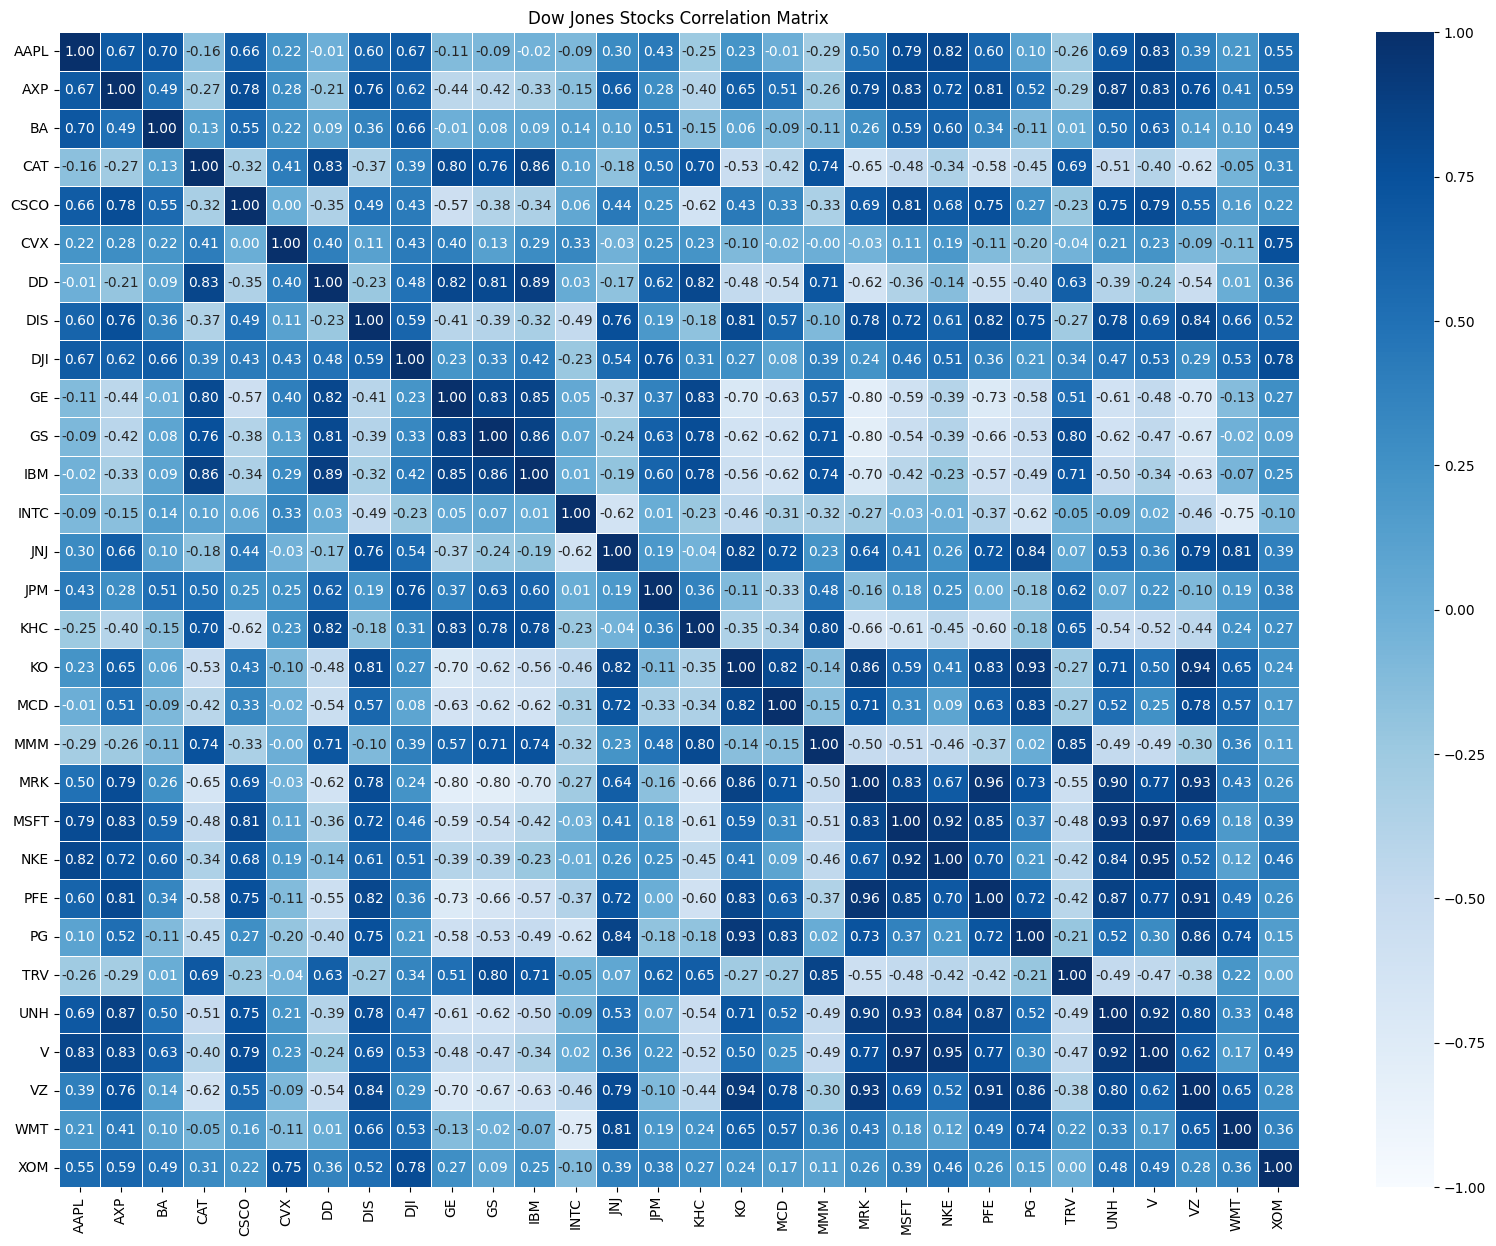

In [4]:
Adj_df = stock_df['Adj Close']   # Extracted the Adj close from dataframe
print(Adj_df.isnull().sum())               # Checking for null values
display(Adj_df)
Corr_matrix = Adj_df.corr()       #  Correlation matrix of Adj close  

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(Corr_matrix, cmap='Blues', annot=True, fmt='.2f', linewidths=0.7, vmin = -1, vmax = 1)
plt.title('Dow Jones Stocks Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)  
plt.show()

#### construct bar graphs to show the weight of each stock for the first and second principal components

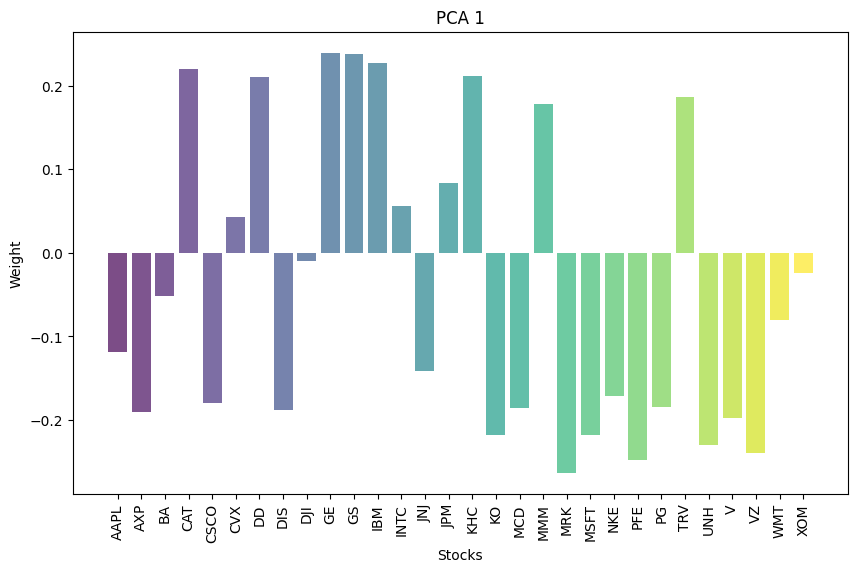

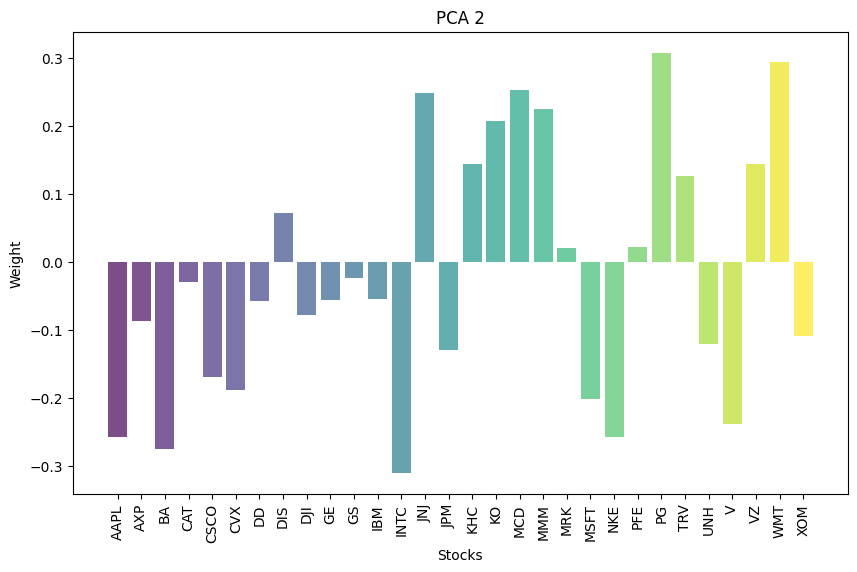

In [5]:
pca = PCA()                       # Applying PCA to the correlation matrix#
pca.fit(Corr_matrix)              # Fitting the PCA model to the correlation matrix

Weight = pca.components_
colors = plt.cm.viridis(np.linspace(0, 1, len(Adj_df.columns)))
# Create bar graphs for the weight of each stock
plt.figure(figsize=(10, 6))
plt.bar(Adj_df.columns, Weight[0], alpha=0.7,color = colors)
plt.title("PCA 1")
plt.xticks(rotation=90)
plt.xlabel("Stocks")
plt.ylabel("Weight")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(Adj_df.columns, Weight[1], alpha=0.7, color = colors)
plt.title("PCA 2")
plt.xticks(rotation=90)
plt.xlabel("Stocks")
plt.ylabel("Weight")
plt.show()


#### 1.4 Calculating Variance and scree plot and then determine the principal components required for 95% of the variance

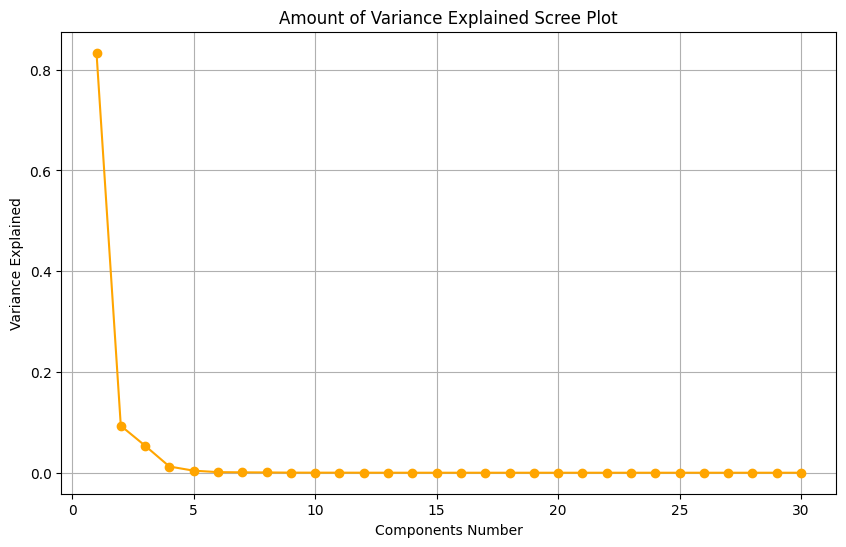

The Number of principle component required to explain 95% of the variance is 3


In [6]:
pca = PCA()                                       # Applying PCA to the correlation matrix
pca.fit(Corr_matrix)                               # Fitting the PCA model to the correlation matrix

explained_var = pca.explained_variance_ratio_      # Calculate the explained variance ratio for each principal component


cum_var = np.cumsum(explained_var)      # Calculate the cumulative explained variance

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', color='orange')
plt.title('Amount of Variance Explained Scree Plot')
plt.xlabel('Components Number')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

#  Calculate the number of principal components required to explain 95% of the variance
n_value = np.argmax(cum_var >= 0.95) +1   
print(f'The Number of principle component required to explain 95% of the variance is {n_value}')

#### 1.5 Produce a scatter plot of the first two principal components and then calculate the mean of all 30 stocks for each principal component

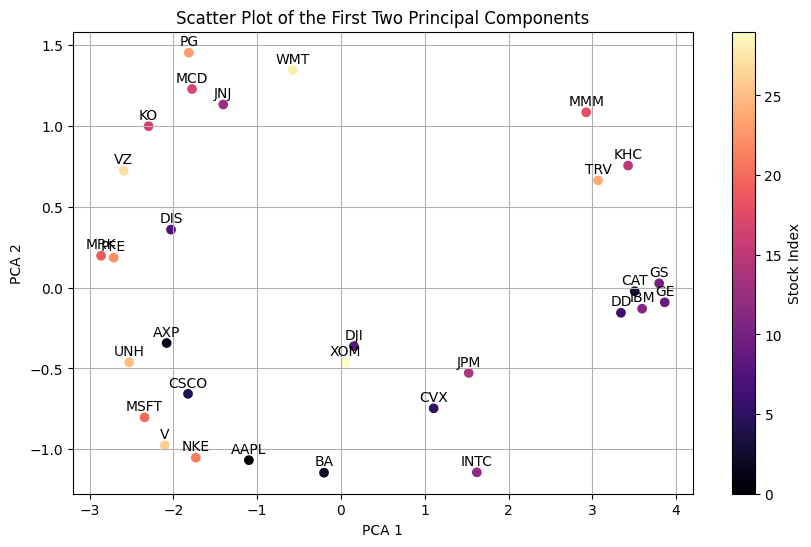

The most three distant stocks for PCA 1: ['VZ', 'PFE', 'MRK']
The most three distant stocks for PCA 2: ['WMT', 'PG', 'INTC']


In [7]:
pca = PCA()
pca.fit(Corr_matrix)                 # Fitting the PCA model to the correlation matrix

# Get the first two principal components
n_component = pca.transform(Corr_matrix)[:, :2]

# Create a scatter plot of the first two principal components 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(n_component[:, 0], n_component[:, 1], c=range(len(n_component)), cmap='magma')

# Looping to Annotate scatter point with the stock 
for i, stock in enumerate(Adj_df.columns):
    plt.annotate(stock, (n_component[i, 0], n_component[i, 1]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title("Scatter Plot of the First Two Principal Components")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='Stock Index')
plt.grid(True)
plt.show()

# Finding the mean for all stocks
mean1 = np.mean(n_component[:, 0])
mean2 = np.mean(n_component[:, 1])

# Determining Euclidean distances
distance1 = np.linalg.norm(n_component[:, 0] - mean1)
distance2 = np.linalg.norm(n_component[:, 1] - mean2)

# Identifying the three most distant stocks for each principal component
most_distant1 = Adj_df.columns[np.argsort(np.abs(pca.components_[0, :]))[-3:]].tolist()
most_distant2 = Adj_df.columns[np.argsort(np.abs(pca.components_[1, :]))[-3:]].tolist()

print(f'The most three distant stocks for PCA 1: {most_distant1}')
print("The most three distant stocks for PCA 2:", most_distant2)


#### 2.

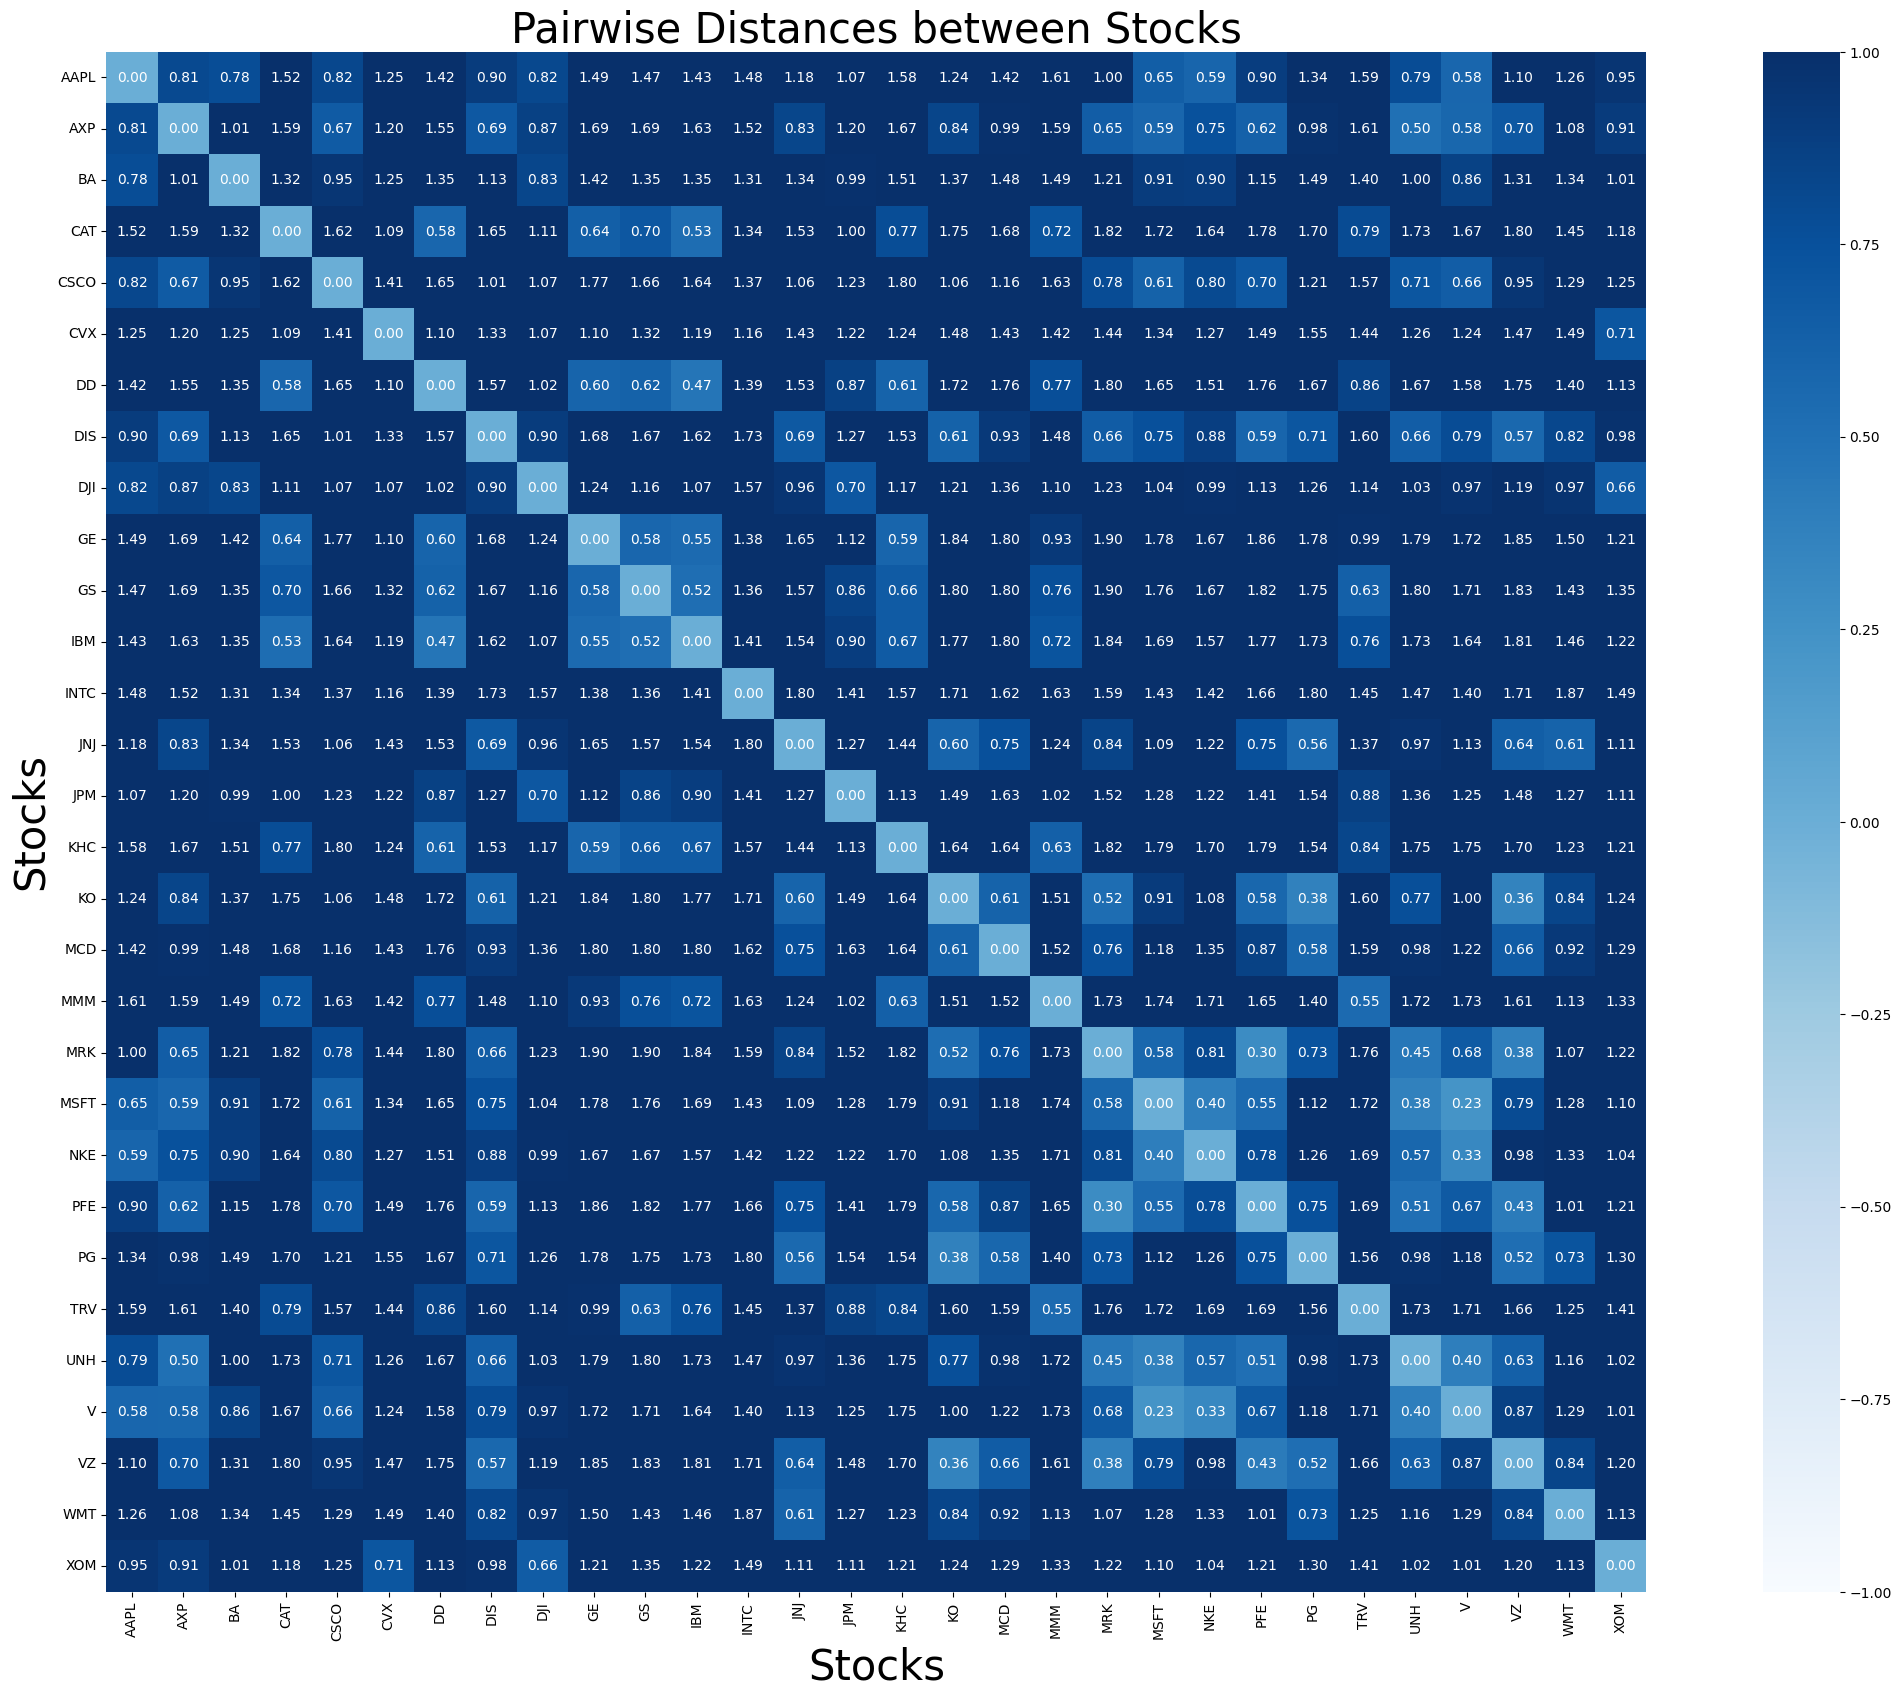

In [8]:
# Pairwise distance
distance = np.sqrt(2 * (1 - Corr_matrix))

# Create a heatmap of the pairwise distances
plt.figure(figsize=(30, 20))
sns.heatmap(distance, cmap="Blues", annot=True, fmt=".2f", square=True, vmin=-1, vmax=1)
plt.title("Pairwise Distances between Stocks", fontsize=30)
plt.xlabel("Stocks", fontsize = 30)
plt.ylabel("Stocks", fontsize = 30)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Interpretation of Distances:

Closer to 0: Stocks with distances closer to 0 are more similar in their price movements. A distance of 0 indicates perfect positive correlation.
Closer to sqrt(2): Stocks with distances closer to 
2
2
​
  are more dissimilar. A distance of 
2
2
​
  indicates perfect negative correlation.
In-between: Distances between 0 and 
2
2
​
  represent the degree of similarity or dissimilarity between stocks.

#### 2.4 horizontal dendrogram using the average linkage approach

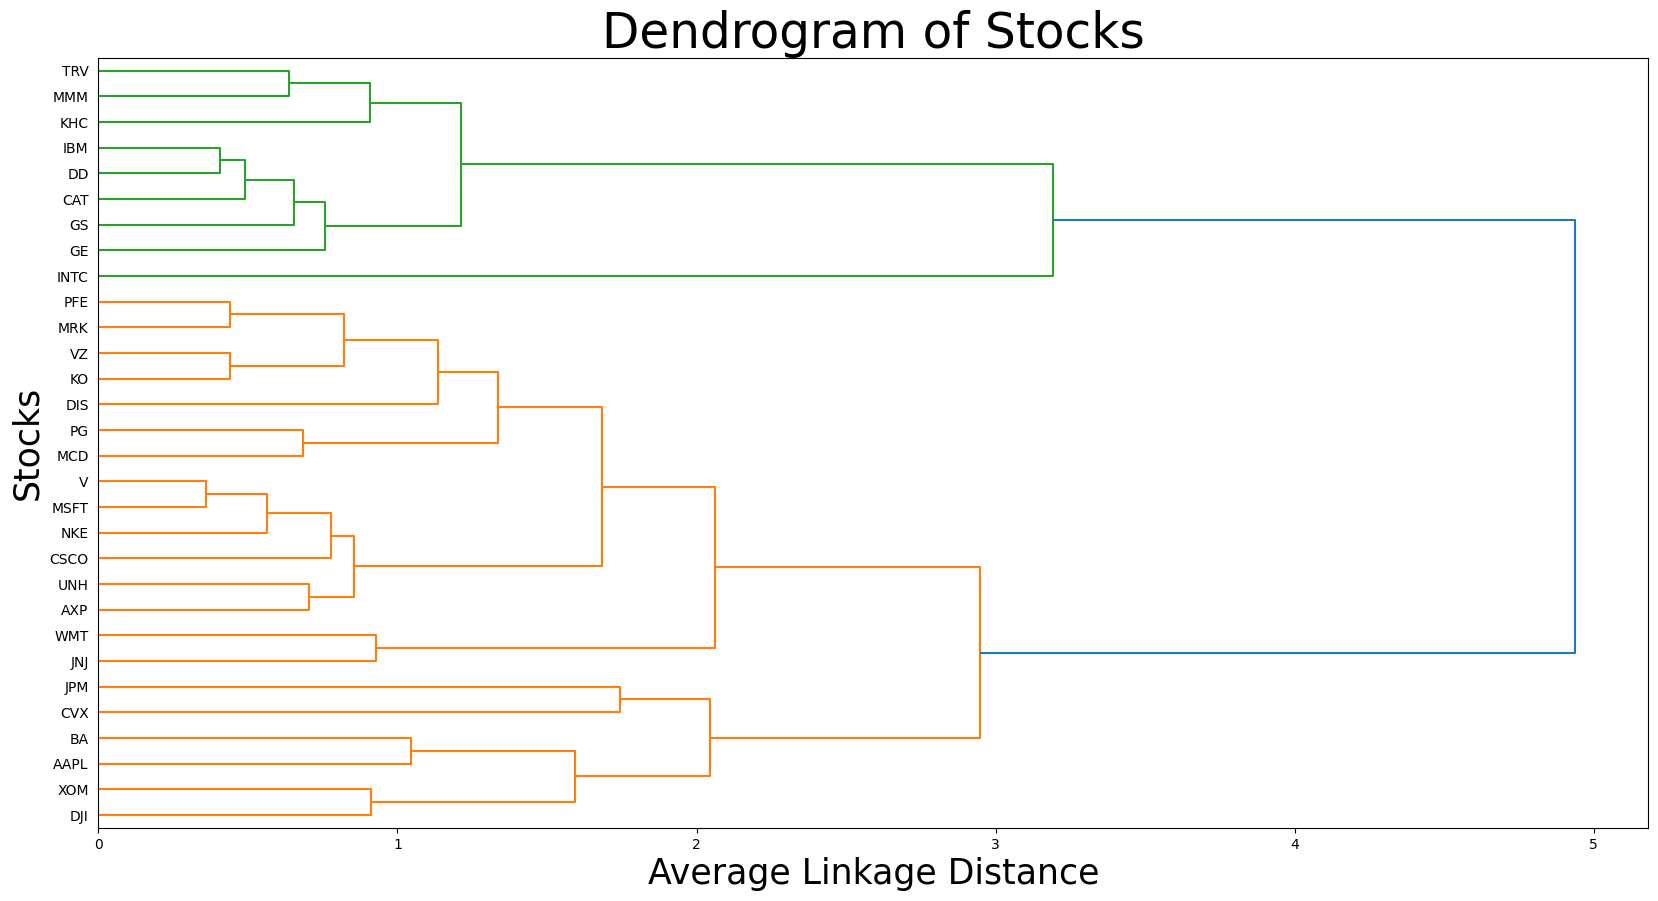

In [9]:
Z = linkage(Corr_matrix, method='average')      # Hierarchical clustering using average linkage

# Plot the dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z, orientation='right', labels=Adj_df.columns, leaf_font_size=10)
plt.title('Dendrogram of Stocks', fontsize  = 35)
plt.xlabel('Average Linkage Distance', fontsize = 25)
plt.ylabel('Stocks', fontsize = 25)
plt.show()

#### 2.5

Cluster 2: ['AAPL', 'BA']
Cluster 6: ['AXP', 'CSCO', 'MSFT', 'NKE', 'UNH', 'V']
Cluster 8: ['CAT', 'DD', 'GE', 'GS', 'IBM', 'KHC', 'MMM', 'TRV']
Cluster 3: ['CVX']
Cluster 7: ['DIS', 'KO', 'MCD', 'MRK', 'PFE', 'PG', 'VZ']
Cluster 1: ['DJI', 'XOM']
Cluster 9: ['INTC']
Cluster 5: ['JNJ', 'WMT']
Cluster 4: ['JPM']


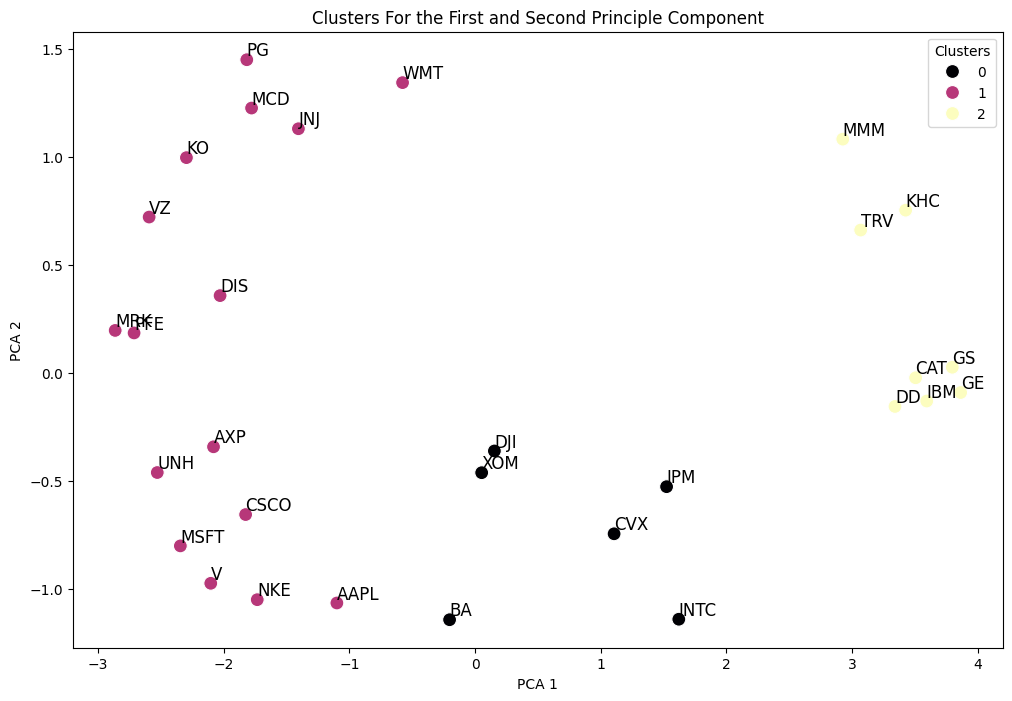

In [10]:
threshold = 1.5 
clusters = fcluster(Z, t=threshold, criterion='distance')

stock_clusters = {}   # Initialize a dictionary to store stocks in each cluster
# Loop through each stock and its cluster ID
for stock, cluster_id in zip(Adj_df.columns, clusters):
    if cluster_id not in stock_clusters:
        stock_clusters[cluster_id] = [stock]
    else:
        stock_clusters[cluster_id].append(stock)

# Print stocks in each cluster
for cluster_id, stocks in stock_clusters.items():
    print(f"Cluster {cluster_id}: {stocks}")

# Extract the first two principal components
pc1 = n_component[:, 0]
pc2 = n_component[:, 1]

# Combine PC1 and PC2 into a feature matrix
feature_matrix = np.column_stack((pc1, pc2))

# Specify the number of clusters (adjust as needed)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(feature_matrix)

# Plot the clusters with different colors and annotate points with stock names
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=pc1, y=pc2, hue=cluster_labels, palette='magma', s=100)

# Annotate each point with the stock name
for i, Stock in enumerate(Adj_df.columns):
    scatter.text(pc1[i], pc2[i], Stock, horizontalalignment='left', verticalalignment='bottom', fontsize=12, color='black')

plt.title('Clusters For the First and Second Principle Component')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Clusters')
plt.show()


#### 3.4

In [11]:
Titanic_df = pd.read_csv('titanic3.csv')

In [12]:
titanic_df = Titanic_df[['age', 'sex', 'pclass', 'survived']]
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)
titanic_df.isnull().sum()
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})

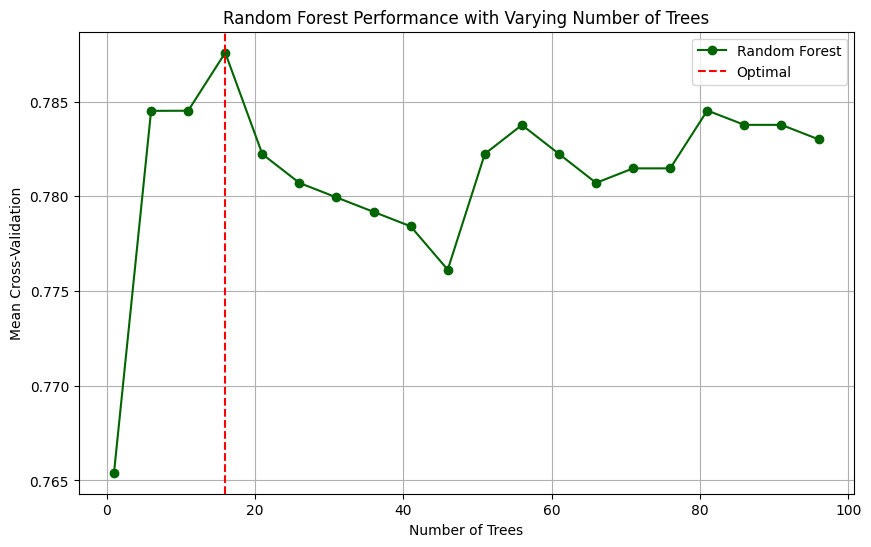

the Optimal number of trees: 16


In [13]:
# Feature selection
X = titanic_df[['age', 'sex', 'pclass']]
y = titanic_df['survived']

# Create a range of the number of trees to try
Range_tree = range(1, 101, 5)

# Initialize an empty list to store mean cross-validated accuracies
cv_accuracy = []

# Perform k-fold cross-validation for each number of trees
for tree in Range_tree:
    rf_classifier = RandomForestClassifier(n_estimators= tree, random_state=42)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    CV_accuracy = cross_val_score(rf_classifier, X, y, cv=kfold)
    cv_accuracy.append(np.mean(CV_accuracy))
    
# Find the optimal number of trees
optimal_number= Range_tree[np.argmax(cv_accuracy)]
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(Range_tree, cv_accuracy, marker='o', c='darkgreen', label = 'Random Forest')
plt.title('Random Forest Performance with Varying Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Cross-Validation')
plt.grid()
optimal_accuracy = np.max(cv_accuracy)
plt.axvline(x=optimal_number, color='red', linestyle='--', label='Optimal')
plt.legend()
plt.show()

print(f"the Optimal number of trees: {optimal_number}")


#### 3.5

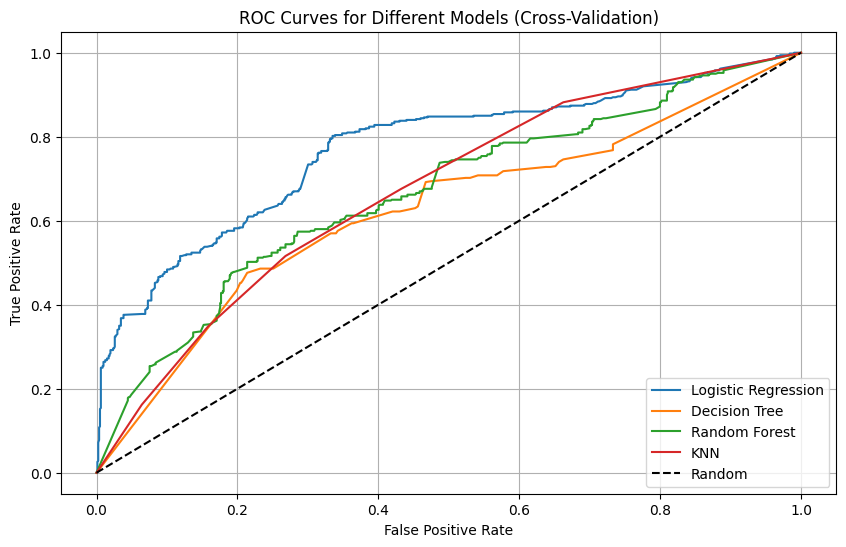

Logistic Regression: (AUC = 0.86)
Decision Tree : (AUC = 0.63)
Random Forest (AUC = 0.71)
KNN (AUC = 0.70)


In [14]:
# Initialize models
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
#Perform cross-validation and get predicted probabilities
y_pred_logistic = cross_val_predict(logistic_regression, X, y, cv=5, method='predict_proba')[:, 1]
y_pred_decision_tree = cross_val_predict(decision_tree, X, y, cv=5, method='predict_proba')[:, 1]
y_pred_random_forest = cross_val_predict(random_forest, X, y, cv=5, method='predict_proba')[:, 1]
y_pred_knn = cross_val_predict(knn, X, y, cv=5, method='predict_proba')[:, 1]

# Compute ROC AUC scores
auc_logistic = cross_val_score(logistic_regression, X, y, cv=5, scoring='roc_auc').mean()
auc_decision_tree = cross_val_score(decision_tree, X, y, cv=5, scoring='roc_auc').mean()
auc_random_forest = cross_val_score(random_forest, X, y, cv=5, scoring='roc_auc').mean()
auc_knn = cross_val_score(knn, X, y, cv=5, scoring='roc_auc').mean()

# Plot ROC curves
plt.figure(figsize=(10, 6))

# Logistic Regression ROC curve
fpr_logistic, tpr_logistic, _ = roc_curve(y, y_pred_logistic)
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression')

# Decision Tree ROC curve
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y, y_pred_decision_tree)
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree')

# Random Forest ROC curve
fpr_random_forest, tpr_random_forest, _ = roc_curve(y, y_pred_random_forest)
plt.plot(fpr_random_forest, tpr_random_forest, label='Random Forest')

# KNN ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y, y_pred_knn)
plt.plot(fpr_knn, tpr_knn, label='KNN')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models (Cross-Validation)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f'Logistic Regression: (AUC = {auc_logistic:.2f})')
print(f'Decision Tree : (AUC = {auc_decision_tree:.2f})')
print(f'Random Forest (AUC = {auc_random_forest:.2f})')
print(f'KNN (AUC = {auc_knn:.2f})')

#### 4.2

In [15]:
Red_wine = pd.read_csv('winequality-red.csv', delimiter = ';')
Red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Optimal Number of Leaves: 49


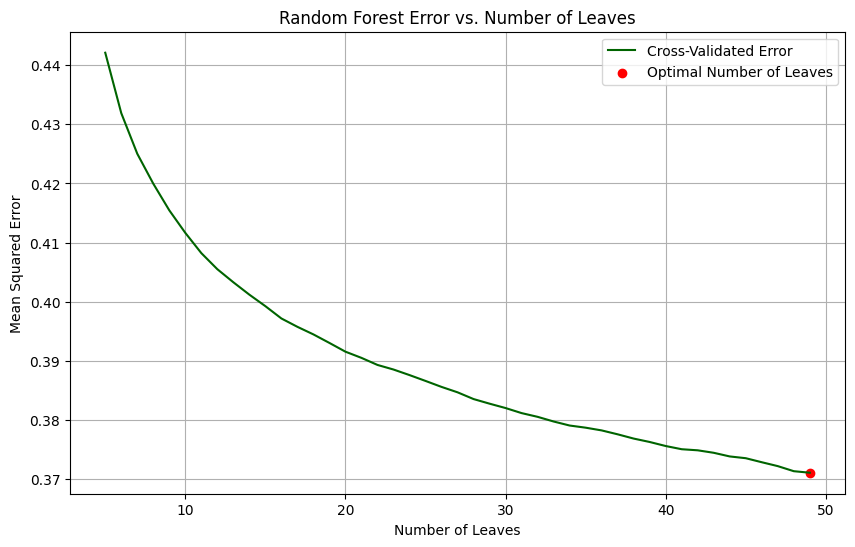

In [16]:
# Feature selection
X = Red_wine.iloc[:, :-1]  # Extract independent Red wine features columns
y = Red_wine.iloc[:, -1]  
leaves_range = range(5, 50)

train_errors = []

for num_leave in leaves_range:
    rf_regressor = RandomForestRegressor(max_leaf_nodes=num_leave, random_state=42)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(rf_regressor, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mean_error = -cv_results.mean()
    train_errors.append(mean_error)

# Find the optimal number of leaves
opt_num_leaves = leaves_range[train_errors.index(min(train_errors))]

print(f"Optimal Number of Leaves: {opt_num_leaves}")

# Plot errors against the number of leaves
plt.figure(figsize=(10, 6))
plt.plot(leaves_range, train_errors, label='Cross-Validated Error', c = 'darkgreen')
plt.scatter(opt_num_leaves, min(train_errors), marker='o', color='red', label='Optimal Number of Leaves')
plt.xlabel('Number of Leaves')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Error vs. Number of Leaves')
plt.legend()
plt.grid(True)
plt.show()

#### 4.3

Optimal Number of Trees: 190


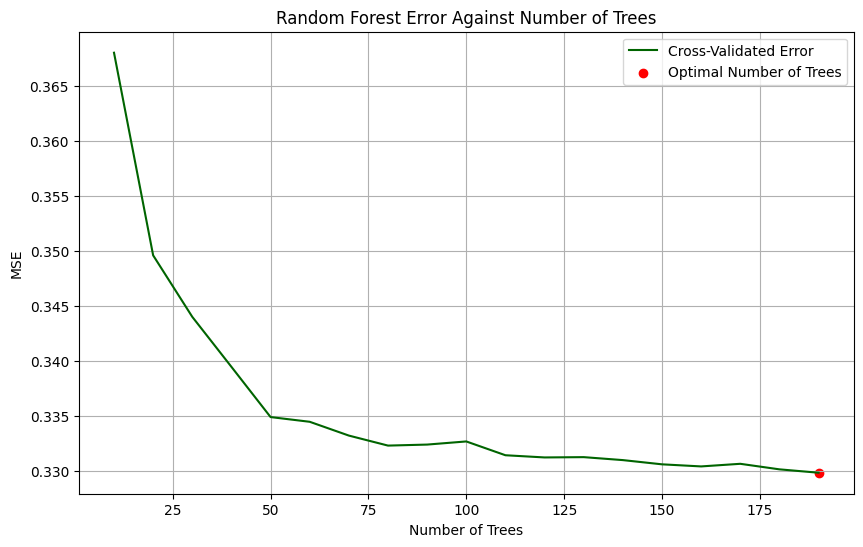

In [17]:
num_trees = list(range(10, 200, 10))

error = []

for num_tree in num_trees:
    # Create a random forest regressor with the specified number of trees
    rf_regressor = RandomForestRegressor(n_estimators=num_tree, random_state=42)
    
    # Perform k-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(rf_regressor, X, y, cv=kfold, scoring='neg_mean_squared_error')
    
    # Calculate mean squared error and store errors
    mean_train_error = -cross_val_results.mean()  # Negative sign because cross_val_score returns neg_mean_squared_error
    error.append(mean_train_error)  # Training error 

# Find the optimal number of trees
opt_num_trees = num_trees[error.index(min(error))]

print(f"Optimal Number of Trees: {opt_num_trees}")

# Plot errors against the number of trees
plt.figure(figsize=(10, 6))
plt.plot(num_trees, error, label='Cross-Validated Error', c = 'darkgreen')
plt.scatter(opt_num_trees, min(error), marker='o', color='red', label='Optimal Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.title('Random Forest Error Against Number of Trees')
plt.legend()
plt.grid()
plt.show()


#### 4.4

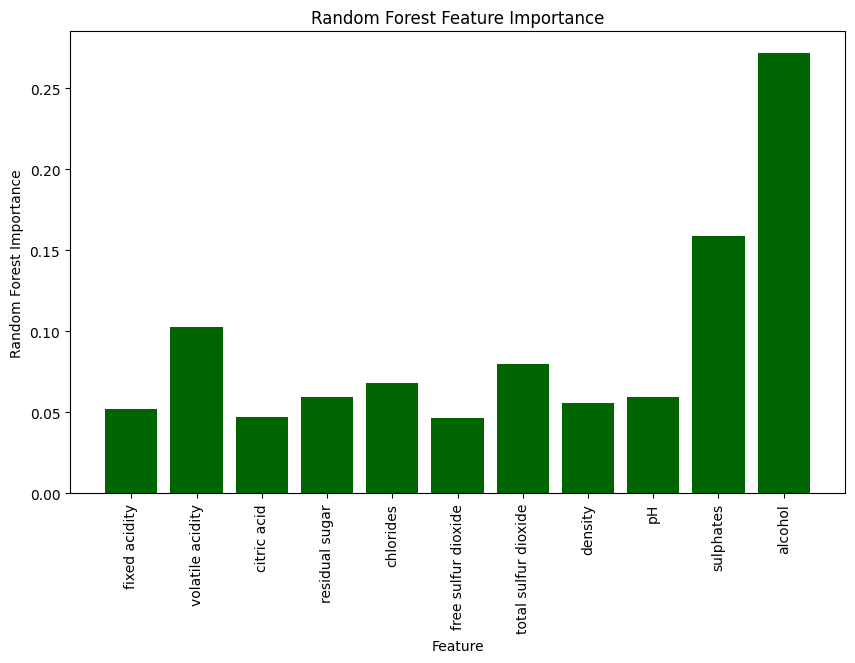

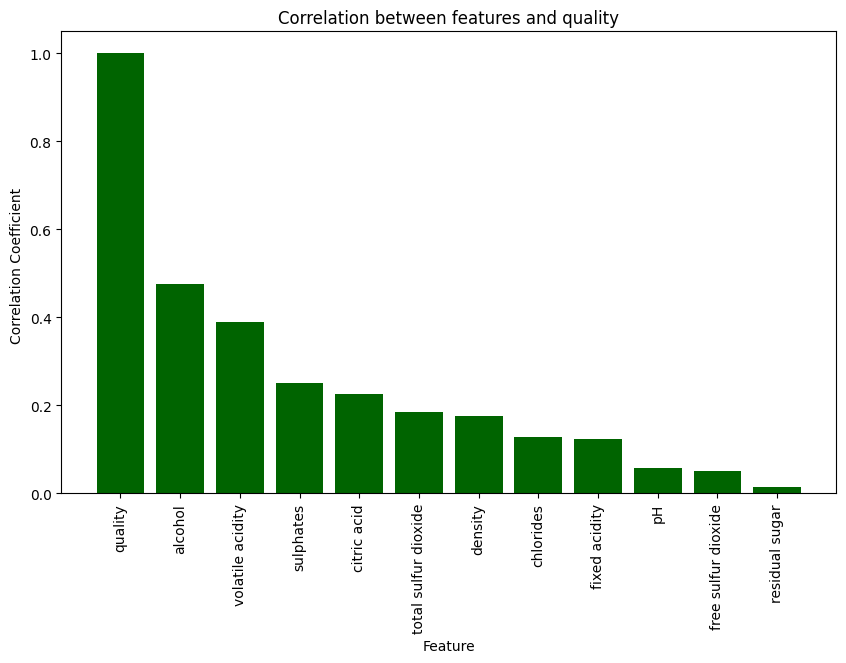

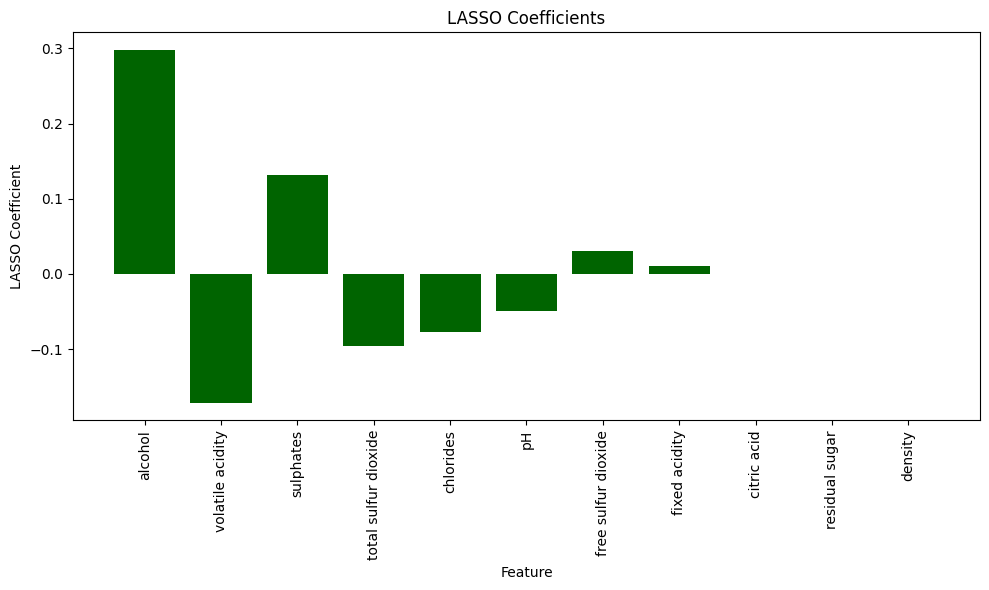

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for LASSO)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Get feature importances
feature_rf = model_rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_rf_df = pd.DataFrame({'Feature': X.columns, 'Random Forest Importance': feature_rf})
feature__rf_df = feature_rf_df.sort_values(by='Random Forest Importance', ascending=False)

# Example for correlation
Corr_matrice = Red_wine.corr()
Corr_feature = Corr_matrice.abs()['quality'].sort_values(ascending=False)

# Example for LASSO (assuming you have trained a LASSO model)
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_model.fit(X_train_scaled, y_train)
lasso_coefficients = lasso_model.coef_

# Create a DataFrame for LASSO coefficients
lasso_importance_df = pd.DataFrame({'Feature': X.columns, 'LASSO Coefficient': lasso_coefficients})
lasso_importance_df = lasso_importance_df.sort_values(by='LASSO Coefficient', key=abs, ascending=False)

# Plot the bar graphs separately
plt.figure(figsize=(10, 6))


plt.bar(range(len(feature_rf_df)), feature_rf_df['Random Forest Importance'], align='center', color = 'darkgreen')
plt.xticks(range(len(feature_rf_df)), feature_rf_df['Feature'], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Random Forest Importance')
plt.title('Random Forest Feature Importance')

plt.figure(figsize=(10, 6))
plt.bar(range(len(Corr_feature)), Corr_feature, align='center', color = 'darkgreen')
plt.xticks(range(len(Corr_feature)), Corr_feature.index, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient ')
plt.title('Correlation between features and quality')

plt.figure(figsize=(10, 6))
plt.bar(range(len(lasso_importance_df)), lasso_importance_df['LASSO Coefficient'], align='center',  color = 'darkgreen')
plt.xticks(range(len(lasso_importance_df)), lasso_importance_df['Feature'], rotation=90)
plt.xlabel('Feature')
plt.ylabel('LASSO Coefficient')
plt.title('LASSO Coefficients')

plt.tight_layout()
plt.show()


#### 4.5

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_knn = KNeighborsRegressor(n_neighbors=5)  

# Function to perform cross-validation and return R-squared and MSE
def cv_metric(model, X, y):
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    mses = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    return r2_scores.mean(), mses.mean()

# Evaluate models using cross-validation
rf_r2, rf_mse = cv_metric(model_rf, X, y)
lr_r2, lr_mse = cv_metric(model_lr, X, y)
knn_r2, knn_mse = cv_metric(model_knn, X_scaled, y)  # KNN benefits from feature scaling

# Train models on the training set
model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)
model_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
rf_pred = model_rf.predict(X_test)
lr_pred = model_lr.predict(X_test)
knn_pred = model_knn.predict(scaler.transform(X_test))

# Calculate R-squared and MSE on the test set
rf_r2_test = r2_score(y_test, rf_pred)
rf_mse_test = mean_squared_error(y_test, rf_pred)

lr_r2_test = r2_score(y_test, lr_pred)
lr_mse_test = mean_squared_error(y_test, lr_pred)

knn_r2_test = r2_score(y_test, knn_pred)
knn_mse_test = mean_squared_error(y_test, knn_pred)

# Print the results
print("Cross-validated metrics:")
print('Random Forest\n')
print(f'R-squared:{rf_r2}')
print(f'Mean Square Error: {rf_mse}')
      
print('Linear Regression\n')
print(f'R-squared:{lr_r2}')
print(f'Mean Square Error: {lr_mse}')

print("KNN - R-squared\n")
print(f'R-squared: {knn_r2}')
print(f'Mean Square Error {knn_mse}')

Cross-validated metrics:
Random Forest

R-squared:0.3156618915046366
Mean Square Error: 0.42676697629310345
Linear Regression

R-squared:0.29004162884219686
Mean Square Error: 0.4366293880320978
KNN - R-squared

R-squared: 0.1797991836551426
Mean Square Error 0.5056039184952977
